<a href="https://colab.research.google.com/github/wvirany/microbiome/blob/main/rel_abundance_enet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.linear_model import Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.svm import SVC

## Data Loading and Preprocessing

In [357]:
ibd = pd.read_csv("ibd_rel_abundance.csv")
healthy = pd.read_csv("healthy_rel_abundance.csv")

In [358]:
print(ibd.shape)
ibd.head()

(1201, 579)


,Phocaeicola vulgatus,Bacteroides uniformis,Bacteroides thetaiotaomicron,Faecalibacterium prausnitzii,Roseburia faecis,Bacteroides caccae,Enterocloster clostridioformis,Bacteroides fragilis,Fusicatenibacter saccharivorans,Flavonifractor plautii,...,Prevotella histicola,Prevotella pallens,Chlamydia ibidis,Enterococcus mundtii,Anaerostipes sp. 992a,Actinobaculum sp. oral taxon 183,Lachnoclostridium sp. An298,Haemophilus haemolyticus,Enterococcus dispar,Atopobium minutum
0,8436640,6235541,1357098,1054351,999360,551484,334448,168192,139201,133264,...,0,0,0,0,0,0,0,0,0,0
1,17080974,9468596,2861845,189087,190713,479440,315591,182143,268493,427323,...,0,0,0,0,0,0,0,0,0,0
2,12088033,14919763,7543241,452106,455094,1991901,537137,7969977,5346,185637,...,0,0,0,0,0,0,0,0,0,0
3,9174317,15253970,4019070,988736,429513,964149,46820,3271311,37552,86170,...,0,0,0,0,0,0,0,0,0,0
4,3662205,8560295,7882055,817546,814911,686063,27640,4984518,9446,411733,...,0,0,0,0,0,0,0,0,0,0


In [359]:
print(healthy.shape)
healthy.head()

(426, 579)


,Phocaeicola vulgatus,Bacteroides uniformis,Bacteroides thetaiotaomicron,Faecalibacterium prausnitzii,Roseburia faecis,Bacteroides caccae,Enterocloster clostridioformis,Bacteroides fragilis,Fusicatenibacter saccharivorans,Flavonifractor plautii,...,Prevotella histicola,Prevotella pallens,Chlamydia ibidis,Enterococcus mundtii,Anaerostipes sp. 992a,Actinobaculum sp. oral taxon 183,Lachnoclostridium sp. An298,Haemophilus haemolyticus,Enterococcus dispar,Atopobium minutum
0,3533802,0,1337816,687547,53255,715021,0,372727,65730,0,...,0,0,0,0,0,0,0,0,0,0
1,6064315,0,3210841,1360390,170153,988210,0,556607,6110,0,...,0,0,0,0,0,0,0,0,0,0
2,8981714,417246,2959316,3261926,428559,2618916,0,378112,43182,3868,...,0,0,0,0,0,0,0,0,0,0
3,4846186,668638,127925,1308172,247559,445041,0,0,85596,77852,...,0,0,0,0,0,0,0,0,0,0
4,3127461,0,1190156,1030098,126186,804786,0,135517,47591,0,...,0,0,0,0,0,0,0,0,0,0


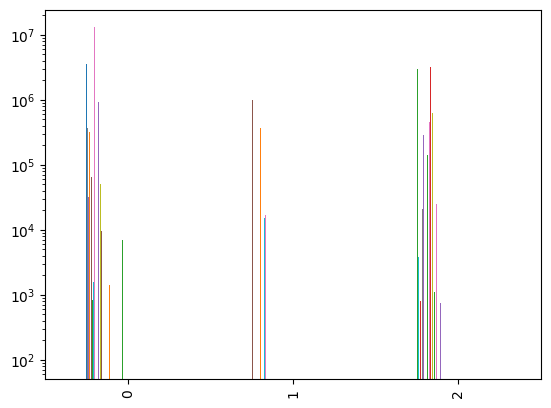

In [360]:
healthy[:3].plot(kind='bar', legend=False, logy=True);

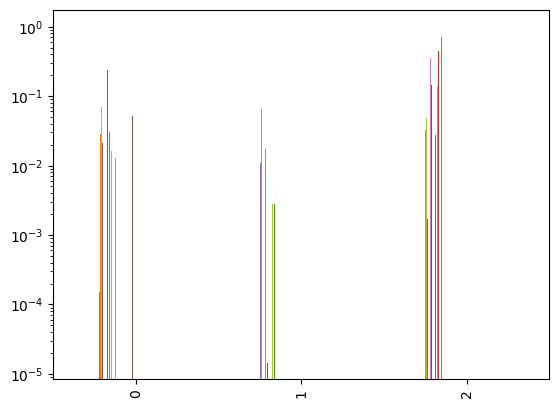

In [361]:
healthy_normalized = healthy.copy()   # Copying original dataframe

# Dividing each column by its maximum value
for column in healthy.columns:
    healthy_normalized[column] = healthy_normalized[column]  / healthy[column].abs().max()

# Plotting first 5 entries of normalized dataframe
healthy_normalized[:3].plot(kind='bar', legend=False, logy=True);

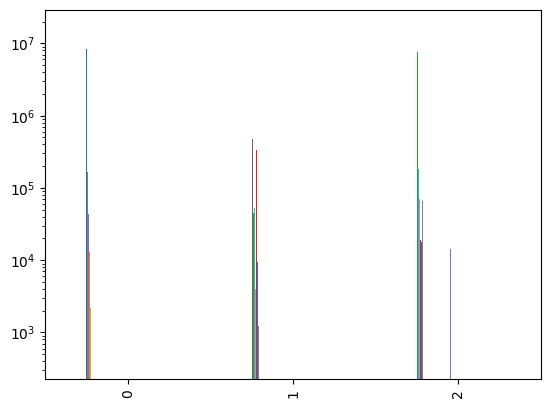

In [362]:
ibd[:3].plot(kind='bar', legend=False, logy=True);

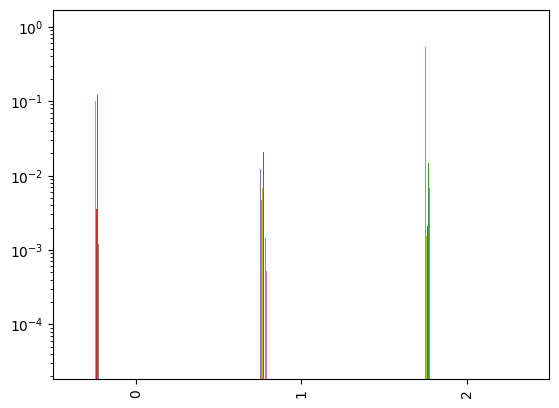

In [363]:
ibd_normalized = ibd.copy()   # Copying original dataframe

# Dividing each column by its maximum value
for column in ibd.columns:
    ibd_normalized[column] = ibd_normalized[column]  / ibd[column].abs().max()

# Plotting first 5 entries of normalized dataframe
ibd_normalized[:3].plot(kind='bar', legend=False, logy=True);

In [364]:
ibd_normalized.insert(0, 'IBD', 1);

<ipython-input-364-836459436a02>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ibd_normalized.insert(0, 'IBD', 1);


In [365]:
healthy_normalized.insert(0, 'IBD', 0);

<ipython-input-365-5689b795f7b5>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  healthy_normalized.insert(0, 'IBD', 0);


In [366]:
healthy_normalized.head()

,IBD,Phocaeicola vulgatus,Bacteroides uniformis,Bacteroides thetaiotaomicron,Faecalibacterium prausnitzii,Roseburia faecis,Bacteroides caccae,Enterocloster clostridioformis,Bacteroides fragilis,Fusicatenibacter saccharivorans,...,Prevotella histicola,Prevotella pallens,Chlamydia ibidis,Enterococcus mundtii,Anaerostipes sp. 992a,Actinobaculum sp. oral taxon 183,Lachnoclostridium sp. An298,Haemophilus haemolyticus,Enterococcus dispar,Atopobium minutum
0,0,0.145263,0.000000,0.223903,0.046683,0.003363,0.076529,0.0,0.019606,0.073251,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
1,0,0.249284,0.000000,0.537380,0.092369,0.010744,0.105768,0.0,0.029279,0.006809,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2,0,0.369208,0.032873,0.495284,0.221480,0.027061,0.280303,0.0,0.019889,0.048123,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,0,0.199211,0.052680,0.021410,0.088823,0.015632,0.047633,0.0,0.000000,0.095390,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
4,0,0.128560,0.000000,0.199190,0.069942,0.007968,0.086136,0.0,0.007128,0.053036,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [367]:
data = pd.concat([ibd_normalized, healthy_normalized]).sample(frac=1).set_index(np.arange(0, 1627))

X = data.drop('IBD', axis=1).fillna(0)
y = data['IBD']

## LassoCV

In [368]:
alphas = [10**(x) for x in np.arange(-4, 0, step=.5)]

lassoCV = LassoCV(cv = 5,
                alphas=alphas,
                random_state=42).fit(X, y)

In [369]:
for i in range(559):
  idx = np.argmin(np.abs(lassoCV.coef_))
  X = X.drop(X.columns[idx], axis=1)
  lassoCV.coef_ = np.delete(lassoCV.coef_, idx)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [370]:
coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, random_state=42)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

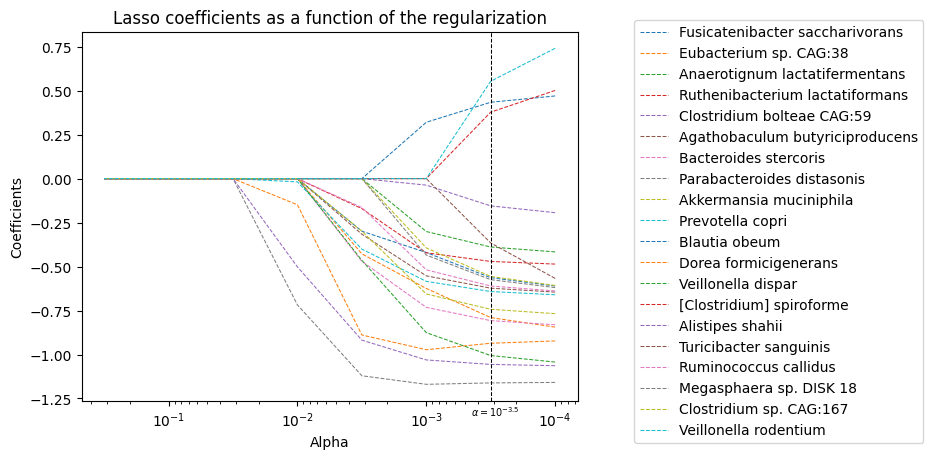

In [371]:
fig = plt.figure()
ax = plt.subplot(111)
trans = ax.get_xaxis_transform()

ax.plot(alphas, coefs, ls='dashed', lw=.75)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axvline(lassoCV.alpha_, lw=.75, ls='dashed', c='black')
plt.text(x=10**-3.35, y=-.04, s='$\\alpha = 10^{-3.5}$', fontsize='x-small', transform=trans)
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
ax.legend(X.columns, bbox_to_anchor=(1.1, 1.05))
plt.show()

## ElasticNetCV

In [372]:
X2 = data.drop('IBD', axis=1).fillna(0)
y2 = data['IBD']

In [373]:
l1_ratios = [.1, .5, .7, .9, .95, .99, 1]

enetCV = ElasticNetCV(l1_ratio=l1_ratios,
                    alphas=alphas,
                    cv=5,
                    random_state=1984).fit(X2, y2)

In [374]:
for i in range(559):
  idx = np.argmin(np.abs(enetCV.coef_))
  X2 = X2.drop(X2.columns[idx], axis=1)
  enetCV.coef_ = np.delete(enetCV.coef_, idx)

In [375]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.2, random_state=1)

In [376]:
coefs = []

for a in alphas:
    enet = ElasticNet(alpha=a, random_state=1984)
    enet.fit(X2_train, y2_train)
    coefs.append(enet.coef_)

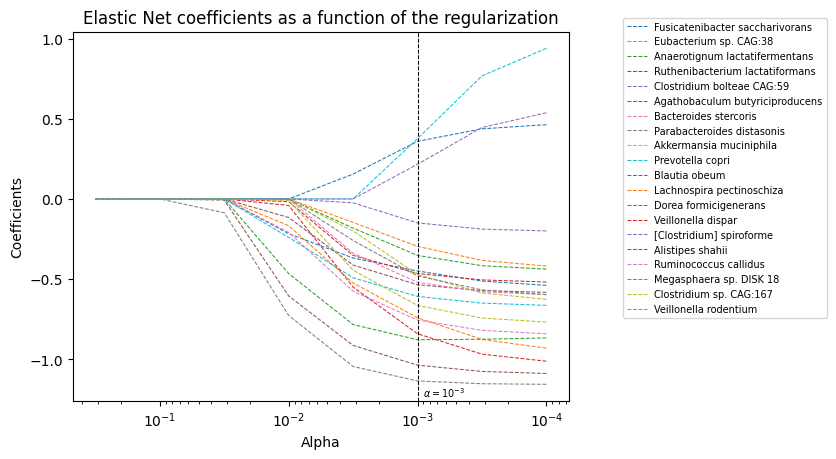

In [377]:
fig = plt.figure()
ax = plt.subplot(111)
trans = ax.get_xaxis_transform()

ax.plot(alphas, coefs, ls='dashed', lw=.75)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axvline(enetCV.alpha_, lw=.75, ls='dashed', c='black')
plt.text(enetCV.alpha_ - .0001 , y=.01, s='$\\alpha = 10^{-3}$', fontsize='x-small', transform=trans)
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Elastic Net coefficients as a function of the regularization")
plt.axis("tight")
ax.legend(X2.columns, bbox_to_anchor=(1.1, 1.05), fontsize=7)
plt.show()

## Support Vector Machine

In [378]:
linear_params = {'C': [2.0**(x) for x in np.arange(-5, 16)],
                 'kernel': ['linear']}

radial_params = {'C': [2.0**(x) for x in np.arange(0, 13)],
                'gamma': [2.0**(x) for x in np.arange(-15, 4)],
                'kernel': ['rbf']}

svm_linear = GridSearchCV(SVC(), linear_params, refit=True, cv=5, verbose=0)
svm_radial = GridSearchCV(SVC(), radial_params, refit=True, cv=5, verbose=0)

svm_linear.fit(X_train, y_train)
svm_radial.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0,
                               256.0, 512.0, 1024.0, 2048.0, 4096.0],
                         'gamma': [3.0517578125e-05, 6.103515625e-05,
                                   0.0001220703125, 0.000244140625,
                                   0.00048828125, 0.0009765625, 0.001953125,
                                   0.00390625, 0.0078125, 0.015625, 0.03125,
                                   0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0,
                                   8.0],
                         'kernel': ['rbf']})

In [379]:
linear_pred = svm_linear.predict(X_test)

print(classification_report(y_test, linear_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.81        83
           1       0.93      0.95      0.94       243

    accuracy                           0.91       326
   macro avg       0.88      0.87      0.88       326
weighted avg       0.91      0.91      0.91       326



In [380]:
radial_pred = svm_radial.predict(X_test)

print(classification_report(y_test, radial_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        83
           1       0.94      0.96      0.95       243

    accuracy                           0.92       326
   macro avg       0.91      0.89      0.90       326
weighted avg       0.92      0.92      0.92       326



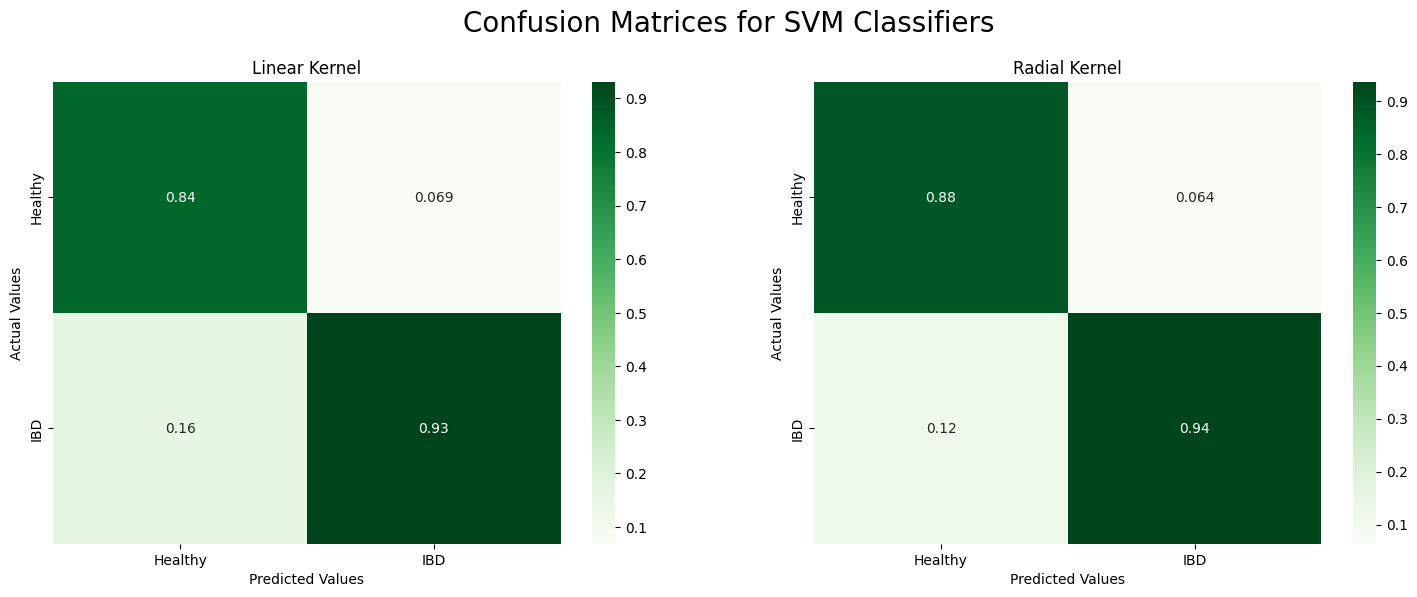

In [381]:
# Creating a confusion matrix for both linear and radial SVM classifier
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

c = confusion_matrix(y_test, linear_pred, normalize='pred')
axes[0] = sns.heatmap(c,
                      annot=True,
                      cmap='Greens',
                      xticklabels=['Healthy', 'IBD'],
                      yticklabels=['Healthy', 'IBD'],
                      cbar=True,
                      ax=axes[0]);

axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')
axes[0].set_title('Linear Kernel');

c = confusion_matrix(y_test, radial_pred, normalize='pred')
axes[1] = sns.heatmap(c,
                      annot=True,
                      cmap='Greens',
                      xticklabels=['Healthy', 'IBD'],
                      yticklabels=['Healthy', 'IBD'],
                      cbar=True,
                      ax=axes[1]);

axes[1].set_ylabel('Actual Values')
axes[1].set_xlabel('Predicted Values')
axes[1].set_title('Radial Kernel');

fig.suptitle('Confusion Matrices for SVM Classifiers', y=1, fontsize=20);

Note: The high false positive rate can be attributed to the fact that there are many more case samples than control samples.

In [382]:
linear_params2 = {'C': [2.0**(x) for x in np.arange(-5, 16)],
                 'kernel': ['linear']}

radial_params2 = {'C': [2.0**(x) for x in np.arange(0, 13)],
                'gamma': [2.0**(x) for x in np.arange(-15, 4)],
                'kernel': ['rbf']}

svm_linear2 = GridSearchCV(SVC(), linear_params2, refit=True, cv=5, verbose=0)
svm_radial2 = GridSearchCV(SVC(), radial_params2, refit=True, cv=5, verbose=0)

svm_linear2.fit(X2_train, y2_train)
svm_radial2.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0,
                               256.0, 512.0, 1024.0, 2048.0, 4096.0],
                         'gamma': [3.0517578125e-05, 6.103515625e-05,
                                   0.0001220703125, 0.000244140625,
                                   0.00048828125, 0.0009765625, 0.001953125,
                                   0.00390625, 0.0078125, 0.015625, 0.03125,
                                   0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0,
                                   8.0],
                         'kernel': ['rbf']})

In [383]:
linear_pred2 = svm_linear2.predict(X2_test)

print(classification_report(y2_test, linear_pred2))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80        83
           1       0.92      0.94      0.93       243

    accuracy                           0.90       326
   macro avg       0.87      0.86      0.86       326
weighted avg       0.90      0.90      0.90       326



In [384]:
radial_pred2 = svm_radial2.predict(X2_test)

print(classification_report(y2_test, radial_pred2))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        83
           1       0.94      0.96      0.95       243

    accuracy                           0.93       326
   macro avg       0.91      0.89      0.90       326
weighted avg       0.93      0.93      0.93       326



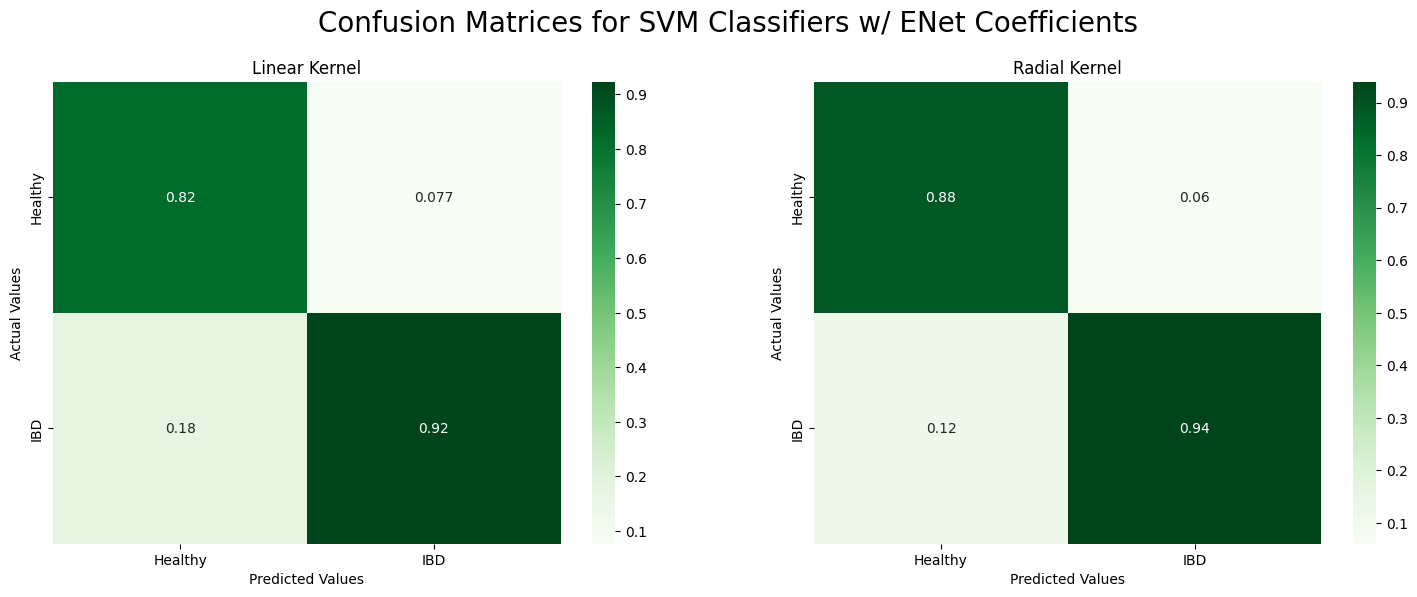

In [385]:
# Creating a confusion matrix for both linear and radial SVM classifier
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

c = confusion_matrix(y_test, linear_pred2, normalize='pred')
axes[0] = sns.heatmap(c,
                      annot=True,
                      cmap='Greens',
                      xticklabels=['Healthy', 'IBD'],
                      yticklabels=['Healthy', 'IBD'],
                      cbar=True,
                      ax=axes[0]);

axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')
axes[0].set_title('Linear Kernel');

c = confusion_matrix(y_test, radial_pred2, normalize='pred')
axes[1] = sns.heatmap(c,
                      annot=True,
                      cmap='Greens',
                      xticklabels=['Healthy', 'IBD'],
                      yticklabels=['Healthy', 'IBD'],
                      cbar=True,
                      ax=axes[1]);

axes[1].set_ylabel('Actual Values')
axes[1].set_xlabel('Predicted Values')
axes[1].set_title('Radial Kernel');

fig.suptitle('Confusion Matrices for SVM Classifiers w/ ENet Coefficients', y=1, fontsize=20);

Note: At this point, the SVM classifier performs slightly worse with ENet coefficients than with Lasso coefficients. However, we will see what happens when both methods are implemented with the goal of finding the optimal subset of features, rather than just choosing 20 most important features.

### Next Steps:
* Use the optimal Lasso parameter rather than just choosing 20 most impotant features
* Plot ROC curves
* Use RF classifier with GridSearchCV and compare prediction accuracy
* Try to reproduce cross validation and cross study steps as described in Pasolli et al.
* Go to bigger studies, more diseases, different models
* More formatting in R
* Cross-validation across 20 independent runs and average results